In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [2]:
#load data
Data =pd.read_excel(r"C:\Users\user\Downloads\Telco Customer Churn\Telco_customer_churn.xlsx")

In [3]:
#check shape of dataset
Data.shape

(7043, 33)

In [4]:
#Preview dataset
Data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
#sumary of dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
#Summary of the dataset shows that there are no missing values. But the preview shows that the dataset contains values coded as `?`. So, I will encode `?` as NaN values
Data[Data == '?'] = np.nan

In [7]:
#check the summary of dataframe again
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [8]:
#Now, the summary shows that the variables - Churn Reason contain missing values. This variables is a categorical data type. So, I will impute the missing values with the most frequent value- the mode.

for col in ['Churn Reason']:
    Data[col].fillna(Data[col].mode()[0], inplace=True)

In [9]:
# Data preprocessing
# Handle missing values
Data.fillna(method='ffill', inplace=True)

# Convert 'Total Charges' from object to float
Data['Total Charges'] = pd.to_numeric(Data['Total Charges'], errors='coerce')
# Check for any remaining NaN values in 'Total Charges' and handle them
Data['Total Charges'].fillna(Data['Total Charges'].mean(), inplace=True)  # Option to fill NaNs with mean value


In [10]:
#Check again for missing values
Data.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

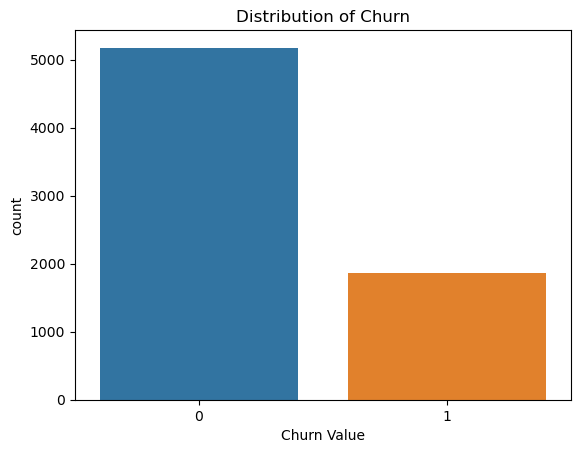

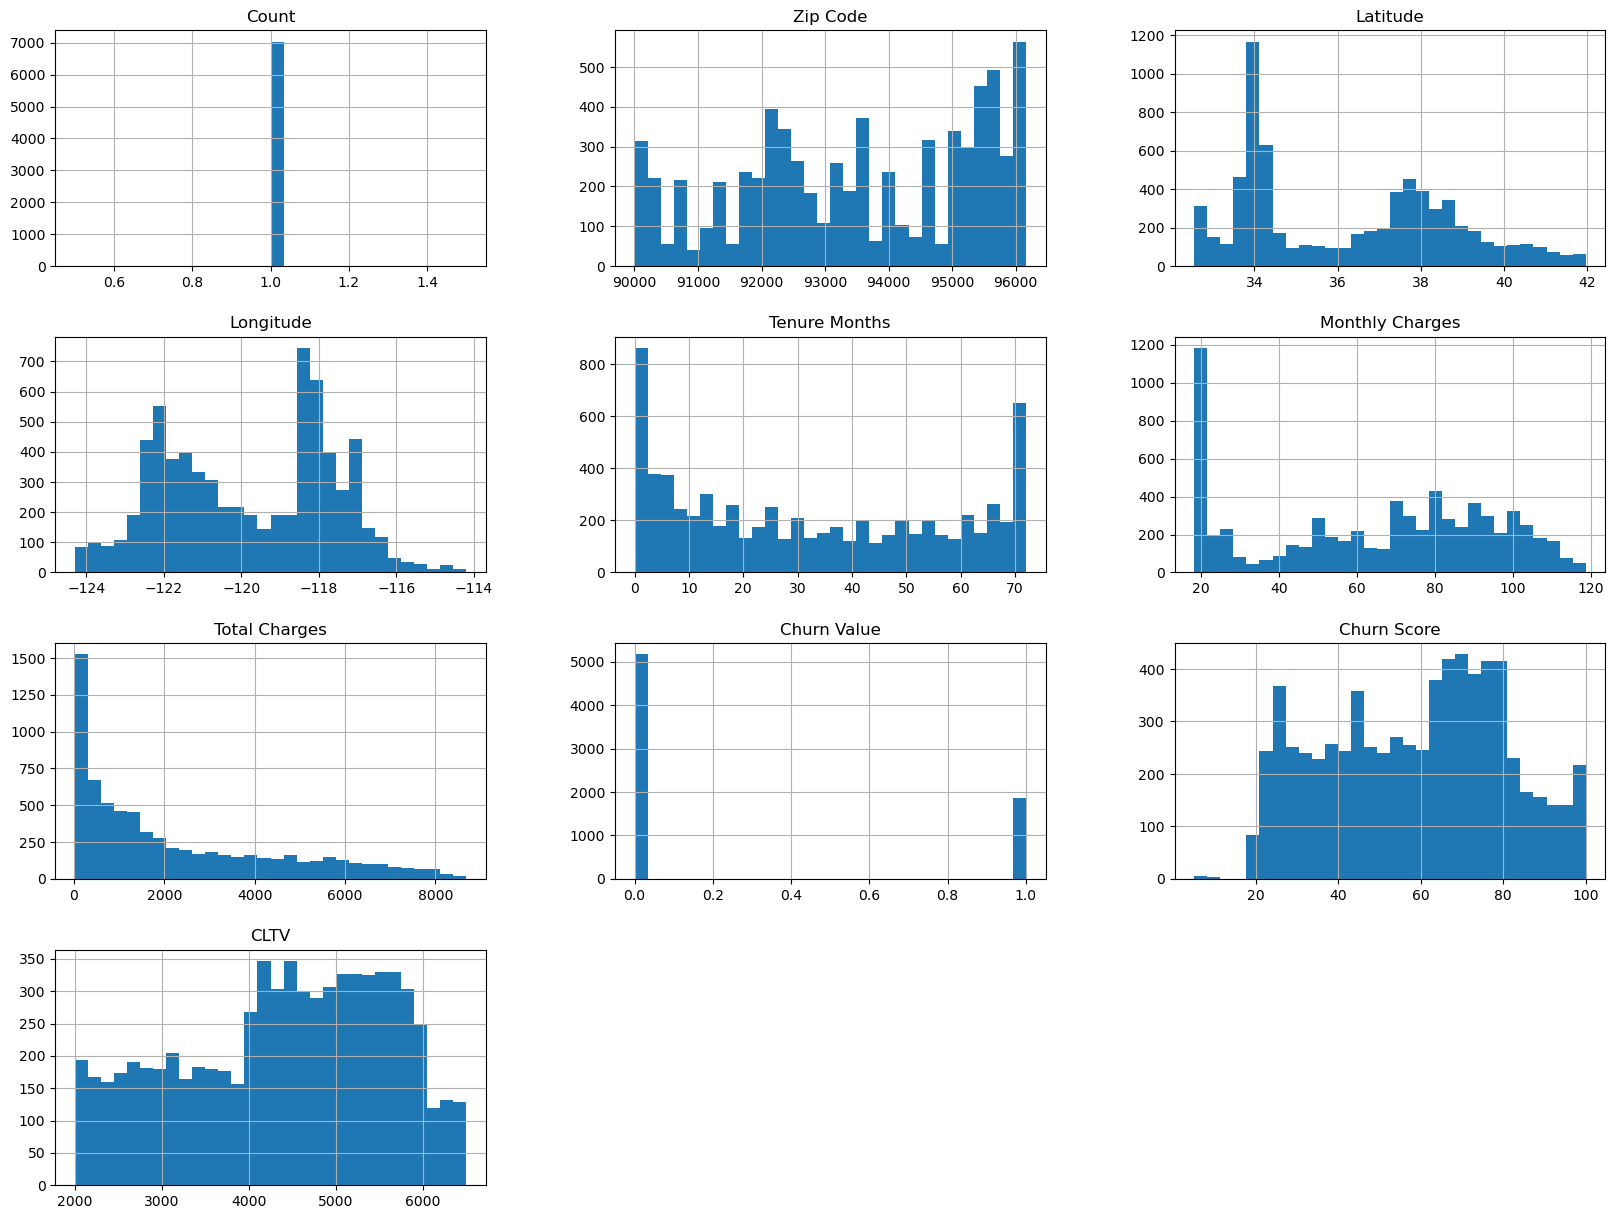

C:\Users\user\AppData\Local\Temp\ipykernel_12708\3735863359.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Data.corr()


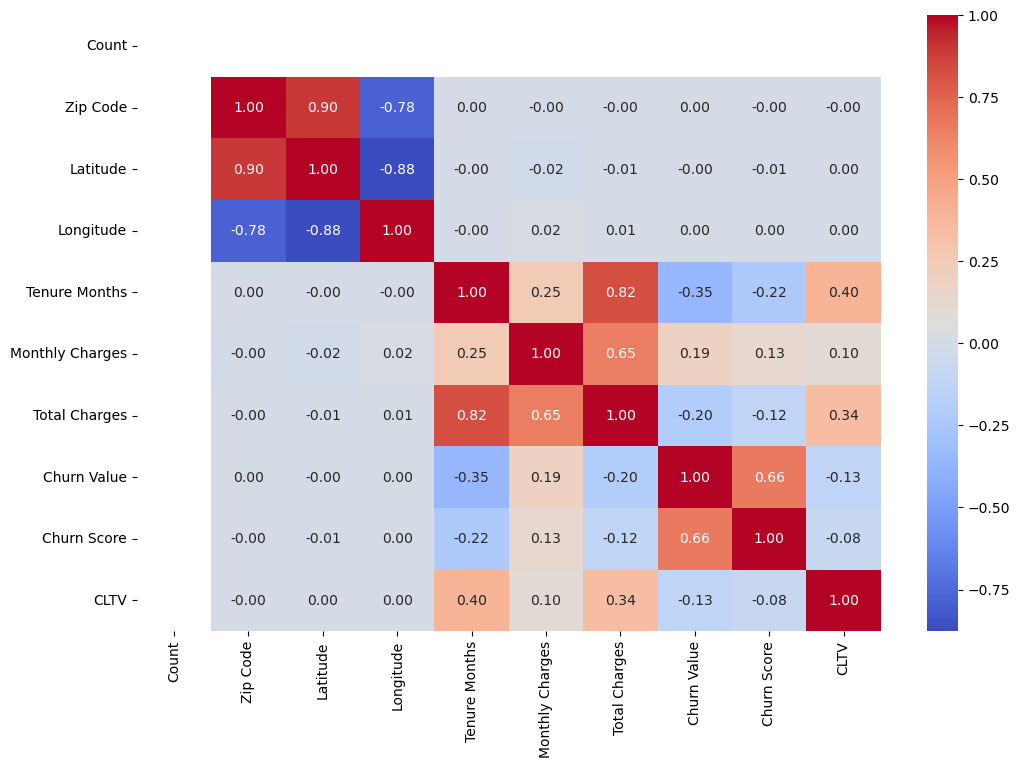

In [11]:
#EDA Exploratory Data Analysis

# Visualize the distribution of churn
sns.countplot(x='Churn Value', data=Data)
plt.title('Distribution of Churn')
plt.show()

# Visualize the distribution of numerical features
Data.hist(bins=30, figsize=(20, 15))
plt.show()

# Visualize the correlation between numerical features and churn
corr_matrix = Data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


In [34]:
#Setting feature vector and target variable
X = Data.drop(['CustomerID','Lat Long','Latitude','Longitude','Churn Label', 'Churn Value'], axis=1)
y = Data['Churn Value']

In [35]:
X.head()

,Count,Country,State,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,Churn Reason
0,1,0,0,562,90003,1,0,0,0,2,...,0,0,0,1,3,53.85,108.15,86,3239,3
1,1,0,0,562,90005,0,0,0,1,2,...,0,0,0,1,2,70.70,151.65,67,2701,13
2,1,0,0,562,90006,0,0,0,1,8,...,2,2,0,1,2,99.65,820.50,86,5372,13
3,1,0,0,562,90010,0,0,1,1,28,...,2,2,0,1,2,104.80,3046.05,84,5003,13
4,1,0,0,562,90015,1,0,0,1,49,...,2,2,0,1,0,103.70,5036.30,89,5340,2


In [36]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
#Encode categorical variables
label_encoders = {}
categorical_columns = ['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 
                       'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 
                       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Reason']

for column in categorical_columns:
    le = LabelEncoder()
    Data[column] = le.fit_transform(Data[column])
    label_encoders[column] = le

In [38]:
# Normalize/standardize numerical features if necessary
scaler = StandardScaler()
numerical_columns = ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 
                     'Churn Value', 'Churn Score', 'CLTV']

In [39]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [41]:
# Model selection and training
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
#Logistic Regression model with all features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.9517


In [43]:
 #Model evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9829666430092264
ROC-AUC: 0.9964618434093162
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1009
           1       0.99      0.94      0.97       400

    accuracy                           0.98      1409
   macro avg       0.99      0.97      0.98      1409
weighted avg       0.98      0.98      0.98      1409



In [44]:
#Logistic Regression with PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 25


C:\Users\user\AppData\Local\Temp\ipykernel_12708\579692328.py:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,14,1)


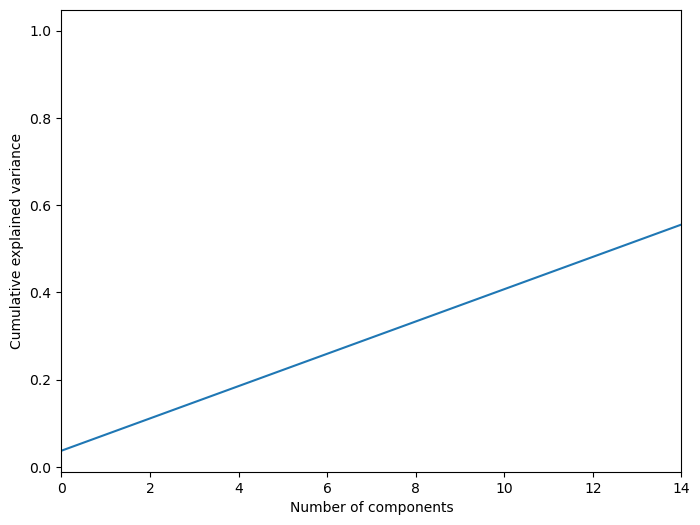

In [45]:
#Plot explained variance ratio with number of dimensions
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [46]:
#Statistical tesing
from scipy import stats

# Chi-square test for categorical features
for column in Data.select_dtypes(include=['uint8']).columns:
    contingency_table = pd.crosstab(df[column], Data['Churn Value'])
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    print(f"Feature: {column}, p-value: {p}")

# T-test for numerical features
for column in Data.select_dtypes(include=['float64', 'int64']).columns:
    churn_yes = Data[Data['Churn Value'] == 1][column]
    churn_no = Data[Data['Churn Value'] == 0][column]
    t_stat, p_val = stats.ttest_ind(churn_yes, churn_no, equal_var=False)
    print(f"Feature: {column}, p-value: {p_val}")


Feature: Count, p-value: nan
Feature: Country, p-value: nan
Feature: State, p-value: nan
Feature: City, p-value: 0.49257336830876997
Feature: Zip Code, p-value: 0.7783607156946287
Feature: Latitude, p-value: 0.7774517521124507
Feature: Longitude, p-value: 0.7003337645567782
Feature: Gender, p-value: 0.46998736558537124
Feature: Senior Citizen, p-value: 3.587587201830332e-29
Feature: Partner, p-value: 7.980266118656921e-38
Feature: Dependents, p-value: 2.2031293957538257e-169
Feature: Tenure Months, p-value: 1.1954945472607151e-232
Feature: Phone Service, p-value: 0.307827859411361
Feature: Multiple Lines, p-value: 0.001478030614339142
Feature: Internet Service, p-value: 1.5211116446071505e-06
Feature: Online Security, p-value: 3.497451569488639e-147
Feature: Online Backup, p-value: 5.990118730124085e-58
Feature: Device Protection, p-value: 5.970905033095523e-48
Feature: Tech Support, p-value: 3.3062663330537806e-138
Feature: Streaming TV, p-value: 0.003807726239881269
Feature: Streamin

C:\Users\user\AppData\Local\Temp\ipykernel_12708\2252099758.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = stats.ttest_ind(churn_yes, churn_no, equal_var=False)


Feature ranking:
1. feature Churn Reason (0.4435589680052052)
2. feature Churn Score (0.3107816237642484)
3. feature Contract (0.04742008446933046)
4. feature Tenure Months (0.02819528343499769)
5. feature Total Charges (0.0233934499603736)
6. feature Monthly Charges (0.022325464164163446)
7. feature Online Security (0.018684882535305446)
8. feature Zip Code (0.014426294555981987)
9. feature CLTV (0.01320659131958188)
10. feature City (0.012789850845085037)
11. feature Tech Support (0.012133260498218865)
12. feature Dependents (0.009078611637404354)
13. feature Device Protection (0.008627816231565562)
14. feature Online Backup (0.005737380177158873)
15. feature Internet Service (0.0056660151706742915)
16. feature Payment Method (0.0055117518214561146)
17. feature Paperless Billing (0.0033761412070262915)
18. feature Streaming TV (0.0027479476744995996)
19. feature Gender (0.002497830665519483)
20. feature Multiple Lines (0.002495645563936495)
21. feature Senior Citizen (0.0024829416874

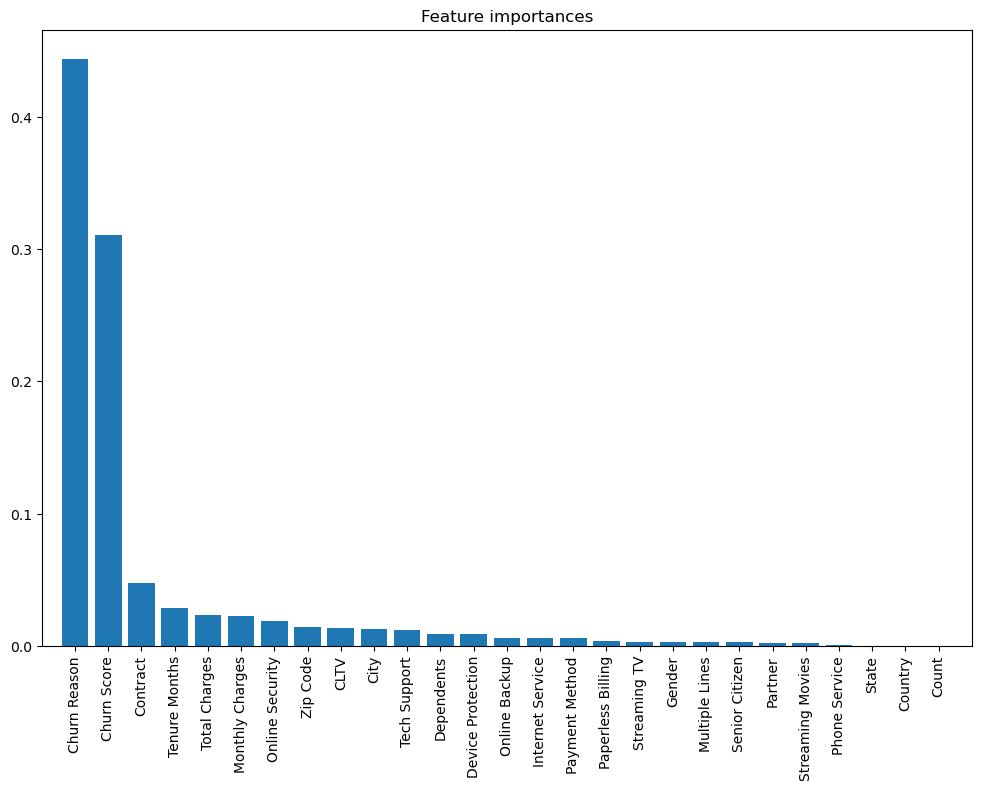

In [47]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()